In [1]:
import pandas as pd
import numpy as np
import pickle

We import the data from the pickle file as JSON:

In [2]:
data_json = pd.read_pickle('summoner_stats.pkl')

## Dataframes generation

We will generate two raw dataframe: one of them will contain the preffered champion statdistics and the other one the stadistics for all champions.

In [3]:
def build_dataframes(json):
    pref_list = []
    total_list = []
    for index in json:
        pref_dict = json[index]['pref_champ']['stats']
        pref_dict['summID'] = index
        pref_dict['champID'] = json[index]['pref_champ']['id']
        pref_list.append(pref_dict)
        total_dict = json[index]['total']['stats']
        total_dict['summID'] = index
        total_list.append(total_dict)
    df_pc = pd.DataFrame(pref_list).set_index('summID')
    df_total = pd.DataFrame(total_list).set_index('summID')
    return df_pc, df_total

In [4]:
df_pc, df_total = build_dataframes(data_json)

We inspect the columns for the 'Preferred champion" dataframe. We also set the "Summoner ID" as the index. 

In [5]:
print(df_pc.columns)
df_pc.head()

Index(['champID', 'maxChampionsKilled', 'maxNumDeaths',
       'mostChampionKillsPerSession', 'mostSpellsCast', 'totalAssists',
       'totalChampionKills', 'totalDamageDealt', 'totalDamageTaken',
       'totalDeathsPerSession', 'totalDoubleKills', 'totalFirstBlood',
       'totalGoldEarned', 'totalMagicDamageDealt', 'totalMinionKills',
       'totalPentaKills', 'totalPhysicalDamageDealt', 'totalQuadraKills',
       'totalSessionsLost', 'totalSessionsPlayed', 'totalSessionsWon',
       'totalTripleKills', 'totalTurretsKilled', 'totalUnrealKills'],
      dtype='object')


,champID,maxChampionsKilled,maxNumDeaths,mostChampionKillsPerSession,mostSpellsCast,totalAssists,totalChampionKills,totalDamageDealt,totalDamageTaken,totalDeathsPerSession,...,totalMinionKills,totalPentaKills,totalPhysicalDamageDealt,totalQuadraKills,totalSessionsLost,totalSessionsPlayed,totalSessionsWon,totalTripleKills,totalTurretsKilled,totalUnrealKills
summID,,,,,,,,,,,,,,,,,,,,,
44294235,222,17,9,17,0,167,181,3822448,388921,111,...,4888,1,3620718,2,14,25,11,5,35,0
23532359,222,27,14,27,0,490,557,10153578,1221385,335,...,12353,1,9793969,2,27,60,33,18,136,0
231468,40,5,9,5,0,1191,63,1873883,975685,245,...,1225,0,406543,0,24,70,46,0,29,0
39058502,76,30,19,30,0,1693,2043,35159844,6050135,1403,...,11625,0,3078010,2,75,213,138,28,162,0
32621719,64,16,11,16,0,304,239,4621061,999398,196,...,3625,0,3084454,0,18,34,16,2,25,0


We reorder the columns and drop some of them like the 0 value stats (deprecated data from the Riot API) and unrelevant data ('unreal kills', 'games against IA', etc..)

In [6]:
df_pc = df_pc[['champID', 'totalSessionsPlayed', 'totalSessionsWon', 'totalSessionsLost', 'totalGoldEarned', 
               'totalMinionKills', 'totalTurretsKilled', 'totalPhysicalDamageDealt', 'totalMagicDamageDealt', 
               'totalDamageTaken', 'totalDeathsPerSession', 'maxNumDeaths', 'totalAssists', 'totalChampionKills', 'totalDoubleKills', 
               'totalTripleKills', 'totalQuadraKills', 'totalPentaKills', 'mostChampionKillsPerSession']]
print(df_pc.dtypes)
df_pc.head()

champID                        int64
totalSessionsPlayed            int64
totalSessionsWon               int64
totalSessionsLost              int64
totalGoldEarned                int64
totalMinionKills               int64
totalTurretsKilled             int64
totalPhysicalDamageDealt       int64
totalMagicDamageDealt          int64
totalDamageTaken               int64
totalDeathsPerSession          int64
maxNumDeaths                   int64
totalAssists                   int64
totalChampionKills             int64
totalDoubleKills               int64
totalTripleKills               int64
totalQuadraKills               int64
totalPentaKills                int64
mostChampionKillsPerSession    int64
dtype: object


,champID,totalSessionsPlayed,totalSessionsWon,totalSessionsLost,totalGoldEarned,totalMinionKills,totalTurretsKilled,totalPhysicalDamageDealt,totalMagicDamageDealt,totalDamageTaken,totalDeathsPerSession,maxNumDeaths,totalAssists,totalChampionKills,totalDoubleKills,totalTripleKills,totalQuadraKills,totalPentaKills,mostChampionKillsPerSession
summID,,,,,,,,,,,,,,,,,,,
44294235,222,25,11,14,298287,4888,35,3620718,186347,388921,111,9,167,181,24,5,2,1,17
23532359,222,60,33,27,788764,12353,136,9793969,310413,1221385,335,14,490,557,95,18,2,1,27
231468,40,70,46,24,706835,1225,29,406543,1455088,975685,245,9,1191,63,0,0,0,0,5
39058502,76,213,138,75,2719116,11625,162,3078010,29079069,6050135,1403,19,1693,2043,220,28,2,0,30
32621719,64,34,16,18,406387,3625,25,3084454,1333948,999398,196,11,304,239,16,2,0,0,16


In [7]:
print(df_pc.columns)
df_pc.head()

Index(['champID', 'totalSessionsPlayed', 'totalSessionsWon',
       'totalSessionsLost', 'totalGoldEarned', 'totalMinionKills',
       'totalTurretsKilled', 'totalPhysicalDamageDealt',
       'totalMagicDamageDealt', 'totalDamageTaken', 'totalDeathsPerSession',
       'maxNumDeaths', 'totalAssists', 'totalChampionKills',
       'totalDoubleKills', 'totalTripleKills', 'totalQuadraKills',
       'totalPentaKills', 'mostChampionKillsPerSession'],
      dtype='object')


,champID,totalSessionsPlayed,totalSessionsWon,totalSessionsLost,totalGoldEarned,totalMinionKills,totalTurretsKilled,totalPhysicalDamageDealt,totalMagicDamageDealt,totalDamageTaken,totalDeathsPerSession,maxNumDeaths,totalAssists,totalChampionKills,totalDoubleKills,totalTripleKills,totalQuadraKills,totalPentaKills,mostChampionKillsPerSession
summID,,,,,,,,,,,,,,,,,,,
44294235,222,25,11,14,298287,4888,35,3620718,186347,388921,111,9,167,181,24,5,2,1,17
23532359,222,60,33,27,788764,12353,136,9793969,310413,1221385,335,14,490,557,95,18,2,1,27
231468,40,70,46,24,706835,1225,29,406543,1455088,975685,245,9,1191,63,0,0,0,0,5
39058502,76,213,138,75,2719116,11625,162,3078010,29079069,6050135,1403,19,1693,2043,220,28,2,0,30
32621719,64,34,16,18,406387,3625,25,3084454,1333948,999398,196,11,304,239,16,2,0,0,16


Now we perform the same actions for the 'All champions' dataframe.

In [8]:
df_total = df_total[['totalSessionsPlayed', 'totalSessionsWon', 'totalSessionsLost', 'totalGoldEarned', 
               'totalMinionKills', 'totalNeutralMinionsKilled', 'totalTurretsKilled', 'totalPhysicalDamageDealt', 
                'totalMagicDamageDealt', 'totalDamageTaken', 'totalHeal', 'totalDeathsPerSession', 'totalAssists', 
                'totalChampionKills', 'totalDoubleKills', 'totalTripleKills', 'totalQuadraKills', 'totalPentaKills']]
print(df_total.dtypes)
df_total.head()

totalSessionsPlayed          int64
totalSessionsWon             int64
totalSessionsLost            int64
totalGoldEarned              int64
totalMinionKills             int64
totalNeutralMinionsKilled    int64
totalTurretsKilled           int64
totalPhysicalDamageDealt     int64
totalMagicDamageDealt        int64
totalDamageTaken             int64
totalHeal                    int64
totalDeathsPerSession        int64
totalAssists                 int64
totalChampionKills           int64
totalDoubleKills             int64
totalTripleKills             int64
totalQuadraKills             int64
totalPentaKills              int64
dtype: object


,totalSessionsPlayed,totalSessionsWon,totalSessionsLost,totalGoldEarned,totalMinionKills,totalNeutralMinionsKilled,totalTurretsKilled,totalPhysicalDamageDealt,totalMagicDamageDealt,totalDamageTaken,totalHeal,totalDeathsPerSession,totalAssists,totalChampionKills,totalDoubleKills,totalTripleKills,totalQuadraKills,totalPentaKills
summID,,,,,,,,,,,,,,,,,,
44294235,170,82,88,2130885,29373,2242,215,18507377,5325852,3590449,686378,869,1489,1152,121,14,4,1
23532359,679,338,341,8092556,107309,7416,699,55736445,28587333,16582565,2744357,4210,5889,4383,456,63,12,2
231468,476,241,235,5228296,36042,11328,227,17468152,24965150,12330531,3835132,2423,5838,1590,85,5,0,0
39058502,1292,687,605,15863556,115442,68497,987,99300224,83438891,37590430,7843774,8491,10835,9798,1037,159,20,3
32621719,449,236,213,5531543,66415,8450,443,34839260,25488926,11989346,2073140,2532,4041,3287,314,45,5,0


## KDA calculation

One important metric in competitive games as League of Legends is the KDA (Kills-Deaths-Assists) ratio. For a given player when can calculate the KDA for the ranked Season 5 as 
\begin{equation}
totalKDA = \frac{totalChampionKills + totalAssists}{totalDeathsPerSession} 
\end{equation}

In [9]:
df_pc['totalKDA'] = (df_pc['totalChampionKills'] + df_pc['totalAssists']) / df_pc['totalDeathsPerSession']

In [10]:
df_pc[['totalKDA', 'totalChampionKills', 'totalAssists', 'totalDeathsPerSession']].head()

,totalKDA,totalChampionKills,totalAssists,totalDeathsPerSession
summID,,,,
44294235,3.135135,181,167,111
23532359,3.125373,557,490,335
231468,5.118367,63,1191,245
39058502,2.662865,2043,1693,1403
32621719,2.770408,239,304,196


In [11]:
df_total['totalKDA'] = (df_total['totalChampionKills'] + df_total['totalAssists']) / df_total['totalDeathsPerSession']

In [12]:
df_total[['totalKDA', 'totalChampionKills', 'totalAssists', 'totalDeathsPerSession']].head()

,totalKDA,totalChampionKills,totalAssists,totalDeathsPerSession
summID,,,,
44294235,3.039125,1152,1489,869
23532359,2.439905,4383,5889,4210
231468,3.065621,1590,5838,2423
39058502,2.429985,9798,10835,8491
32621719,2.894155,3287,4041,2532


## Win rate calculation

We calculate the Win Rate percentage per player for both dataframes (it will be the same as they are the same players).

In [13]:
df_pc['WinRate'] = df_pc['totalSessionsWon'] / df_pc['totalSessionsPlayed']

In [14]:
df_pc[['WinRate', 'totalSessionsPlayed', 'totalSessionsWon', 'totalSessionsLost']].head()

,WinRate,totalSessionsPlayed,totalSessionsWon,totalSessionsLost
summID,,,,
44294235,0.440000,25,11,14
23532359,0.550000,60,33,27
231468,0.657143,70,46,24
39058502,0.647887,213,138,75
32621719,0.470588,34,16,18


In [15]:
df_total['WinRate'] = df_pc['totalSessionsWon'] / df_pc['totalSessionsPlayed']

In [16]:
df_pc[['WinRate', 'totalSessionsPlayed', 'totalSessionsWon', 'totalSessionsLost']].head()

,WinRate,totalSessionsPlayed,totalSessionsWon,totalSessionsLost
summID,,,,
44294235,0.440000,25,11,14
23532359,0.550000,60,33,27
231468,0.657143,70,46,24
39058502,0.647887,213,138,75
32621719,0.470588,34,16,18


## Dataframe description 

### Mean, std, min, max and percentiles

In [17]:
df_pc.describe()

,champID,totalSessionsPlayed,totalSessionsWon,totalSessionsLost,totalGoldEarned,totalMinionKills,totalTurretsKilled,totalPhysicalDamageDealt,totalMagicDamageDealt,totalDamageTaken,...,maxNumDeaths,totalAssists,totalChampionKills,totalDoubleKills,totalTripleKills,totalQuadraKills,totalPentaKills,mostChampionKillsPerSession,totalKDA,WinRate
count,19683.000000,19683.000000,19683.000000,19683.000000,1.968300e+04,19683.000000,19683.000000,1.968300e+04,1.968300e+04,1.968300e+04,...,19683.000000,19683.000000,19683.000000,19683.000000,19683.000000,19683.000000,19683.000000,19683.000000,19683.000000,19683.000000
mean,128.543769,111.792105,62.572270,49.219834,1.366169e+06,15046.653559,118.718996,9.559600e+06,4.767600e+06,2.737681e+06,...,13.532033,1056.512117,787.621348,83.829599,13.064167,2.006706,0.353351,18.867805,2.967031,0.562623
std,117.880538,114.894863,63.933763,51.798772,1.427882e+06,19348.063665,158.487852,1.468879e+07,9.121081e+06,2.991337e+06,...,2.739480,1169.172357,942.564877,113.417232,21.555721,4.184357,0.968602,7.348926,0.791578,0.078264
min,1.000000,3.000000,0.000000,0.000000,2.631800e+04,63.000000,0.000000,2.511600e+04,0.000000e+00,7.356500e+04,...,4.000000,10.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.788210,0.000000
25%,54.000000,44.000000,25.000000,19.000000,5.269295e+05,3619.500000,30.000000,1.139220e+06,5.671165e+05,1.019158e+06,...,12.000000,383.000000,237.000000,16.000000,1.000000,0.000000,0.000000,14.000000,2.440144,0.518519
50%,90.000000,78.000000,44.000000,34.000000,9.359350e+05,8752.000000,68.000000,4.450162e+06,1.663340e+06,1.844853e+06,...,13.000000,701.000000,500.000000,49.000000,6.000000,1.000000,0.000000,20.000000,2.851887,0.562500
75%,157.000000,137.000000,77.000000,61.000000,1.677936e+06,18854.500000,145.000000,1.216840e+07,4.843535e+06,3.323921e+06,...,15.000000,1281.000000,971.000000,105.000000,16.000000,2.000000,0.000000,24.000000,3.349360,0.607143
max,432.000000,1586.000000,846.000000,771.000000,1.901537e+07,259693.000000,2922.000000,2.355749e+08,1.772243e+08,5.685792e+07,...,37.000000,17753.000000,13603.000000,2490.000000,692.000000,145.000000,21.000000,54.000000,10.133333,1.000000


In [18]:
df_total.describe()

,totalSessionsPlayed,totalSessionsWon,totalSessionsLost,totalGoldEarned,totalMinionKills,totalNeutralMinionsKilled,totalTurretsKilled,totalPhysicalDamageDealt,totalMagicDamageDealt,totalDamageTaken,totalHeal,totalDeathsPerSession,totalAssists,totalChampionKills,totalDoubleKills,totalTripleKills,totalQuadraKills,totalPentaKills,totalKDA,WinRate
count,19683.000000,19683.000000,19683.000000,1.968300e+04,19683.000000,19683.000000,19683.000000,1.968300e+04,1.968300e+04,1.968300e+04,1.968300e+04,19683.000000,19683.000000,19683.000000,19683.000000,19683.000000,19683.000000,19683.000000,19683.000000,19683.000000
mean,653.096530,333.516740,319.579790,7.809264e+06,86859.280445,13613.065590,622.197531,5.048275e+07,3.209113e+07,1.649592e+07,2.649009e+06,4036.954682,6071.024082,4180.361124,413.739217,59.134837,8.342529,1.380023,2.644708,0.562623
std,457.319313,232.327472,225.609901,5.535797e+06,67503.988093,12879.502597,489.676044,4.184370e+07,2.667010e+07,1.187256e+07,2.117193e+06,2995.773369,4259.928429,3184.499058,341.487750,55.442262,9.398252,2.038391,0.470853,0.078264
min,50.000000,13.000000,7.000000,4.569480e+05,2155.000000,13.000000,7.000000,5.398040e+05,1.078730e+05,7.168520e+05,6.980000e+04,178.000000,288.000000,107.000000,1.000000,0.000000,0.000000,0.000000,0.749436,0.000000
25%,312.000000,160.000000,151.000000,3.662452e+06,37108.500000,4756.000000,263.000000,1.993115e+07,1.300924e+07,7.644806e+06,1.144268e+06,1818.500000,2898.000000,1815.000000,164.000000,20.000000,2.000000,0.000000,2.326908,0.518519
50%,553.000000,282.000000,270.000000,6.571496e+06,70212.000000,9864.000000,496.000000,3.947223e+07,2.510680e+07,1.385311e+07,2.128946e+06,3315.000000,5189.000000,3384.000000,325.000000,44.000000,5.000000,1.000000,2.588089,0.562500
75%,888.000000,454.000000,435.000000,1.059657e+07,118778.500000,18233.500000,842.000000,6.920212e+07,4.337901e+07,2.237664e+07,3.555310e+06,5475.000000,8184.000000,5688.500000,567.000000,80.000000,11.000000,2.000000,2.897742,0.607143
max,3973.000000,2029.000000,1945.000000,4.867787e+07,674162.000000,145055.000000,4066.000000,3.752711e+08,3.739528e+08,1.280810e+08,2.632631e+07,30551.000000,42181.000000,35016.000000,3652.000000,758.000000,156.000000,27.000000,7.159737,1.000000


### Covariances and Correlation between features

In [19]:
df_pc.cov()

,champID,totalSessionsPlayed,totalSessionsWon,totalSessionsLost,totalGoldEarned,totalMinionKills,totalTurretsKilled,totalPhysicalDamageDealt,totalMagicDamageDealt,totalDamageTaken,...,maxNumDeaths,totalAssists,totalChampionKills,totalDoubleKills,totalTripleKills,totalQuadraKills,totalPentaKills,mostChampionKillsPerSession,totalKDA,WinRate
champID,1.389582e+04,-3.490360e+02,-2.676321e+02,-8.140392e+01,-1.120005e+07,-2.567899e+05,-1.626681e+03,-9.608193e+07,-1.661537e+08,-1.721090e+07,...,-3.527759e+00,1.341311e+04,-1.442227e+04,-1.632243e+03,-2.381314e+02,-2.948769e+01,-4.118378e+00,-2.571606e+02,3.260987e+00,-1.017999
totalSessionsPlayed,-3.490360e+02,1.320083e+04,7.302621e+03,5.898208e+03,1.615836e+08,1.773553e+06,1.425265e+04,1.153929e+09,5.721274e+08,3.266036e+08,...,1.052713e+02,1.187120e+05,9.451601e+04,9.843074e+03,1.540080e+03,2.354295e+02,4.002967e+01,1.910542e+02,-3.566797e+00,-0.324595
totalSessionsWon,-2.676321e+02,7.302621e+03,4.087526e+03,3.215095e+03,8.975911e+07,9.906266e+05,7.976712e+03,6.414140e+08,3.233341e+08,1.806653e+08,...,5.677640e+01,6.535466e+04,5.296234e+04,5.555286e+03,8.761022e+02,1.344560e+02,2.295096e+01,1.118253e+02,-5.791896e-01,0.185605
totalSessionsLost,-8.140392e+01,5.898208e+03,3.215095e+03,2.683113e+03,7.182444e+07,7.829268e+05,6.275942e+03,5.125153e+08,2.487933e+08,1.459383e+08,...,4.849491e+01,5.335735e+04,4.155367e+04,4.287787e+03,6.639780e+02,1.009735e+02,1.707870e+01,7.922889e+01,-2.987607e+00,-0.510200
totalGoldEarned,-1.120005e+07,1.615836e+08,8.975911e+07,7.182444e+07,2.038848e+12,2.386256e+10,1.916587e+08,1.590421e+13,7.263089e+12,4.032810e+12,...,1.384329e+06,1.342269e+09,1.256773e+09,1.355633e+08,2.167376e+07,3.364508e+06,5.794685e+05,3.414019e+06,-8.235952e+04,-1979.145604
totalMinionKills,-2.567899e+05,1.773553e+06,9.906266e+05,7.829268e+05,2.386256e+10,3.743476e+08,2.792551e+06,2.262216e+11,8.358507e+10,4.263514e+10,...,1.655396e+04,1.113010e+07,1.616451e+07,1.898855e+06,3.223552e+05,5.194038e+04,9.118593e+03,6.424943e+04,-2.492905e+03,6.855439
totalTurretsKilled,-1.626681e+03,1.425265e+04,7.976712e+03,6.275942e+03,1.916587e+08,2.792551e+06,2.511840e+04,2.061517e+09,4.458358e+08,3.548670e+08,...,1.371985e+02,9.120733e+04,1.272199e+05,1.510435e+04,2.576184e+03,4.212386e+02,7.560636e+01,4.979172e+02,-2.074393e+01,0.275458
totalPhysicalDamageDealt,-9.608193e+07,1.153929e+09,6.414140e+08,5.125153e+08,1.590421e+13,2.262216e+11,2.061517e+09,2.157605e+14,1.816908e+12,3.028071e+13,...,1.223720e+07,6.479209e+09,1.107807e+10,1.340963e+09,2.317673e+08,3.803620e+07,6.847765e+06,4.719011e+07,-2.287967e+06,-19128.619573
totalMagicDamageDealt,-1.661537e+08,5.721274e+08,3.233341e+08,2.487933e+08,7.263089e+12,8.358507e+10,4.458358e+08,1.816908e+12,8.319412e+13,1.400390e+13,...,4.400418e+06,4.972905e+09,4.503263e+09,4.238945e+08,5.793133e+07,7.668529e+06,1.134776e+06,1.262604e+07,1.726293e+05,25478.534915
totalDamageTaken,-1.721090e+07,3.266036e+08,1.806653e+08,1.459383e+08,4.032810e+12,4.263514e+10,3.548670e+08,3.028071e+13,1.400390e+13,8.948094e+12,...,2.900292e+06,2.850947e+09,2.399801e+09,2.417908e+08,3.670468e+07,5.444719e+06,9.113636e+05,5.092467e+06,-2.130912e+05,-8771.493093


In [20]:
df_pc.corr()

,champID,totalSessionsPlayed,totalSessionsWon,totalSessionsLost,totalGoldEarned,totalMinionKills,totalTurretsKilled,totalPhysicalDamageDealt,totalMagicDamageDealt,totalDamageTaken,...,maxNumDeaths,totalAssists,totalChampionKills,totalDoubleKills,totalTripleKills,totalQuadraKills,totalPentaKills,mostChampionKillsPerSession,totalKDA,WinRate
champID,1.000000,-0.025771,-0.035511,-0.013332,-0.066540,-0.112590,-0.087069,-0.055490,-0.154533,-0.048809,...,-0.010924,0.097322,-0.129802,-0.122085,-0.093716,-0.059782,-0.036069,-0.296851,0.034947,-0.110342
totalSessionsPlayed,-0.025771,1.000000,0.994141,0.991060,0.984927,0.797822,0.782707,0.683743,0.545941,0.950288,...,0.334458,0.883722,0.872757,0.755355,0.621842,0.489702,0.359696,0.226273,-0.039218,-0.036098
totalSessionsWon,-0.035511,0.994141,1.000000,0.970832,0.983232,0.800833,0.787223,0.683002,0.554466,0.944668,...,0.324167,0.874315,0.878872,0.766121,0.635714,0.502599,0.370617,0.238005,-0.011444,0.037093
totalSessionsLost,-0.013332,0.991060,0.970832,1.000000,0.971092,0.781203,0.764475,0.673599,0.526590,0.941856,...,0.341750,0.881041,0.851096,0.729852,0.594664,0.465864,0.340400,0.208133,-0.072864,-0.125851
totalGoldEarned,-0.066540,0.984927,0.983232,0.971092,1.000000,0.863748,0.846916,0.758287,0.557677,0.944170,...,0.353898,0.804023,0.933798,0.837087,0.704173,0.563119,0.418979,0.325349,-0.072866,-0.017710
totalMinionKills,-0.112590,0.797822,0.800833,0.781203,0.863748,1.000000,0.910684,0.795996,0.473636,0.736656,...,0.312317,0.492021,0.886367,0.865317,0.772920,0.641562,0.486570,0.451864,-0.162770,0.004527
totalTurretsKilled,-0.087069,0.782707,0.787223,0.764475,0.846916,0.910684,1.000000,0.885534,0.308413,0.748522,...,0.315999,0.492215,0.851624,0.840286,0.754082,0.635190,0.492512,0.427501,-0.165349,0.022207
totalPhysicalDamageDealt,-0.055490,0.683743,0.683002,0.673599,0.758287,0.795996,0.885534,1.000000,0.013561,0.689152,...,0.304108,0.377275,0.800141,0.804918,0.731987,0.618846,0.481302,0.437161,-0.196775,-0.016639
totalMagicDamageDealt,-0.154533,0.545941,0.554466,0.526590,0.557677,0.473636,0.308413,0.013561,1.000000,0.513260,...,0.176108,0.466321,0.523805,0.409763,0.294649,0.200926,0.128445,0.188364,0.023910,0.035691
totalDamageTaken,-0.048809,0.950288,0.944668,0.941856,0.944170,0.736656,0.748522,0.689152,0.513260,1.000000,...,0.353923,0.815165,0.851135,0.712681,0.569238,0.434992,0.314544,0.231654,-0.089993,-0.037467


In [21]:
df_total.cov()

,totalSessionsPlayed,totalSessionsWon,totalSessionsLost,totalGoldEarned,totalMinionKills,totalNeutralMinionsKilled,totalTurretsKilled,totalPhysicalDamageDealt,totalMagicDamageDealt,totalDamageTaken,totalHeal,totalDeathsPerSession,totalAssists,totalChampionKills,totalDoubleKills,totalTripleKills,totalQuadraKills,totalPentaKills,totalKDA,WinRate
totalSessionsPlayed,2.091410e+05,1.061086e+05,1.030324e+05,2.517483e+09,2.854611e+07,4.611555e+06,2.020692e+05,1.675145e+10,1.054043e+10,5.327949e+09,8.600038e+08,1.316645e+06,1.870414e+06,1.363320e+06,1.341202e+05,1.910321e+04,2.689563e+03,4.381226e+02,-2.585500e+01,-2.706349
totalSessionsWon,1.061086e+05,5.397605e+04,5.213254e+04,1.277954e+09,1.451573e+07,2.340567e+06,1.027891e+05,8.516961e+09,5.347395e+09,2.700519e+09,4.362062e+08,6.662565e+05,9.484827e+05,6.933207e+05,6.838826e+04,9.770325e+03,1.379270e+03,2.256673e+02,-1.146765e+01,-1.079128
totalSessionsLost,1.030324e+05,5.213254e+04,5.089983e+04,1.239529e+09,1.403038e+07,2.270989e+06,9.928010e+04,8.234490e+09,5.193030e+09,2.627430e+09,4.237976e+08,6.503886e+05,9.219313e+05,6.699989e+05,6.573192e+04,9.332887e+03,1.310294e+03,2.124553e+02,-1.438735e+01,-1.627220
totalGoldEarned,2.517483e+09,1.277954e+09,1.239529e+09,3.064505e+13,3.546590e+11,5.679102e+10,2.513294e+09,2.102524e+14,1.285164e+14,6.439760e+13,1.024557e+13,1.598342e+10,2.202178e+10,1.695820e+10,1.698143e+09,2.456710e+08,3.505225e+07,5.767227e+06,-3.594517e+05,-30345.045632
totalMinionKills,2.854611e+07,1.451573e+07,1.403038e+07,3.546590e+11,4.556788e+09,5.740865e+08,3.151350e+07,2.609126e+12,1.497663e+12,7.168785e+11,1.090120e+11,1.809143e+08,2.329147e+08,2.028460e+08,2.115426e+07,3.167623e+06,4.641449e+05,7.761738e+04,-5.058415e+03,-280.355507
totalNeutralMinionsKilled,4.611555e+06,2.340567e+06,2.270989e+06,5.679102e+10,5.740865e+08,1.658816e+08,4.335493e+06,4.042491e+11,2.475927e+11,1.267087e+11,2.093774e+10,2.919872e+07,3.922651e+07,3.180465e+07,3.115525e+06,4.372236e+05,6.074069e+04,9.797435e+03,-7.239754e+02,-42.618228
totalTurretsKilled,2.020692e+05,1.027891e+05,9.928010e+04,2.513294e+09,3.151350e+07,4.335493e+06,2.397826e+05,1.945930e+10,9.723880e+09,5.128951e+09,7.830680e+08,1.299473e+06,1.645626e+06,1.443106e+06,1.518356e+05,2.285853e+04,3.380246e+03,5.729388e+02,-4.253113e+01,-1.886852
totalPhysicalDamageDealt,1.675145e+10,8.516961e+09,8.234490e+09,2.102524e+14,2.609126e+12,4.042491e+11,1.945930e+10,1.750895e+15,7.285513e+14,4.323273e+14,6.387102e+13,1.085608e+11,1.337643e+11,1.232855e+11,1.315852e+10,2.004952e+09,3.001061e+08,5.115951e+07,-3.774958e+06,-203173.865835
totalMagicDamageDealt,1.054043e+10,5.347395e+09,5.193030e+09,1.285164e+14,1.497663e+12,2.475927e+11,9.723880e+09,7.285513e+14,7.112941e+14,2.709613e+14,4.518310e+13,6.631199e+10,9.189463e+10,7.026254e+10,6.741490e+09,9.353976e+08,1.263691e+08,1.971686e+07,-1.473012e+06,-71961.842223
totalDamageTaken,5.327949e+09,2.700519e+09,2.627430e+09,6.439760e+13,7.168785e+11,1.267087e+11,5.128951e+09,4.323273e+14,2.709613e+14,1.409578e+14,2.282040e+13,3.456189e+10,4.741783e+10,3.525698e+10,3.434711e+09,4.847802e+08,6.755507e+07,1.092281e+07,-1.071644e+06,-68956.409634


In [22]:
df_total.corr()

,totalSessionsPlayed,totalSessionsWon,totalSessionsLost,totalGoldEarned,totalMinionKills,totalNeutralMinionsKilled,totalTurretsKilled,totalPhysicalDamageDealt,totalMagicDamageDealt,totalDamageTaken,totalHeal,totalDeathsPerSession,totalAssists,totalChampionKills,totalDoubleKills,totalTripleKills,totalQuadraKills,totalPentaKills,totalKDA,WinRate
totalSessionsPlayed,1.000000,0.998689,0.998610,0.994413,0.924694,0.782941,0.902343,0.875393,0.864199,0.981287,0.888220,0.961037,0.960099,0.936132,0.858815,0.753435,0.625771,0.469990,-0.120071,-0.075614
totalSessionsWon,0.998689,1.000000,0.994604,0.993653,0.925569,0.782206,0.903520,0.876101,0.863013,0.979044,0.886811,0.957265,0.958355,0.937114,0.861997,0.758521,0.631686,0.476519,-0.104831,-0.059348
totalSessionsLost,0.998610,0.994604,1.000000,0.992472,0.921259,0.781552,0.898660,0.872265,0.863054,0.980909,0.887238,0.962290,0.959264,0.932556,0.853185,0.746134,0.617964,0.461979,-0.135437,-0.092156
totalGoldEarned,0.994413,0.993653,0.992472,1.000000,0.949077,0.796527,0.927159,0.907676,0.870470,0.979817,0.874170,0.963786,0.933834,0.961963,0.898295,0.800447,0.673734,0.511093,-0.137903,-0.070040
totalMinionKills,0.924694,0.925569,0.921259,0.949077,1.000000,0.660311,0.953363,0.923710,0.831879,0.894482,0.762754,0.894612,0.809963,0.943617,0.917684,0.846376,0.731606,0.564082,-0.159147,-0.053066
totalNeutralMinionsKilled,0.782941,0.782206,0.781552,0.796527,0.660311,1.000000,0.687433,0.750101,0.720799,0.828634,0.767839,0.756756,0.714954,0.775444,0.708365,0.612299,0.501803,0.373186,-0.119382,-0.042280
totalTurretsKilled,0.902343,0.903520,0.898660,0.927159,0.953363,0.687433,1.000000,0.949704,0.744571,0.882217,0.755319,0.885828,0.788896,0.925440,0.908008,0.841974,0.734501,0.574000,-0.184464,-0.049234
totalPhysicalDamageDealt,0.875393,0.876101,0.872265,0.907676,0.923710,0.750101,0.949704,1.000000,0.652838,0.870238,0.720964,0.866032,0.750426,0.925211,0.920877,0.864237,0.763129,0.599803,-0.191600,-0.062040
totalMagicDamageDealt,0.864199,0.863013,0.863054,0.870470,0.831879,0.720799,0.744571,0.652838,1.000000,0.855733,0.800186,0.829963,0.808841,0.827291,0.740212,0.632602,0.504161,0.362682,-0.117299,-0.034476
totalDamageTaken,0.981287,0.979044,0.980909,0.979817,0.894482,0.828634,0.882217,0.870238,0.855733,1.000000,0.907859,0.971727,0.937551,0.932523,0.847170,0.736477,0.605433,0.451339,-0.191699,-0.074211


In [58]:
plt.show()

In [75]:
import plotly.plotly as py
import plotly.graph_objs as go

import numpy as np

py.sign_in('juanluismoralperez', 'MUMjWF4QwNy8AtZW6WUq')

trace1 = go.Scatter3d(
    x=df_pc.WinRate,
    y=df_pc.totalKDA,
    z=df_pc.totalSessionsPlayed,
    mode='markers',
    marker=dict(
        size=12,
        color=df_pc.champID,                # set color to an array/list of desired values
        colorscale='Viridis',   # choose a colorscale
        opacity=0.8
    )
)

data = [trace1]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='3d-scatter-colorscale')


High five! You successfuly sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~juanluismoralperez/0 or inside your plot.ly account where it is named '3d-scatter-colorscale'


## Data analysis visualization by champion

In [74]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
sns.set(style="whitegrid", color_codes=True)

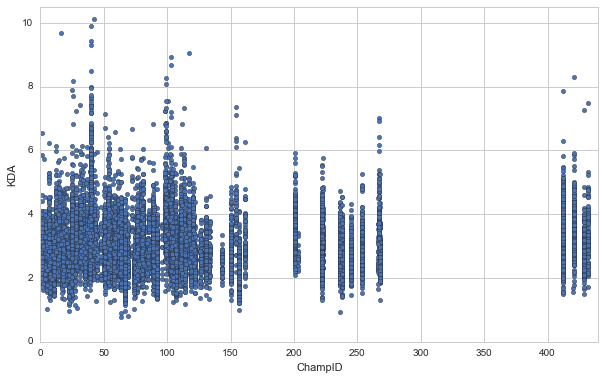

In [83]:
fig = plt.figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(1,1,1)
ax.scatter(df_pc['champID'], df_pc['totalKDA'])
plt.xlabel('ChampID')
plt.ylabel('KDA')
plt.xlim(0, 440)
plt.ylim(0, 10.5)
plt.show()

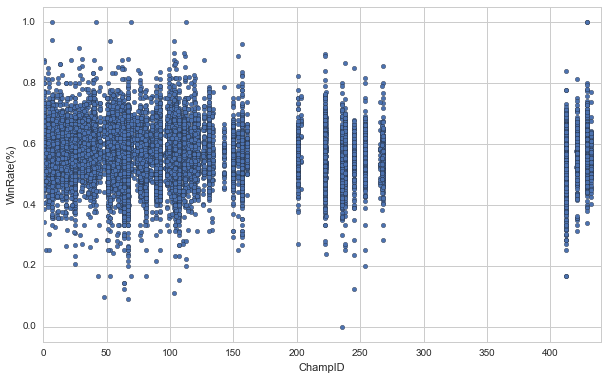

In [85]:
fig = plt.figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(1,1,1)
ax.scatter(df_pc['champID'], df_pc['WinRate'])
plt.xlabel('ChampID')
plt.ylabel('WinRate(%)')
plt.xlim(0, 440)
plt.ylim(-0.05, 1.05)
plt.show()

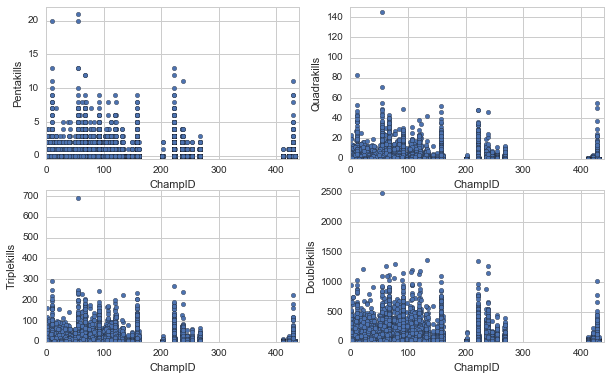

In [58]:
fig = plt.figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
ax1 = fig.add_subplot(2,2,1)
ax1.scatter(df_pc['champID'], df_pc['totalPentaKills'])
ax2 = fig.add_subplot(2,2,2)
ax2.scatter(df_pc['champID'], df_pc['totalQuadraKills'])
ax3 = fig.add_subplot(2,2,3)
ax3.scatter(df_pc['champID'], df_pc['totalTripleKills'])
ax4 = fig.add_subplot(2,2,4)
ax4.scatter(df_pc['champID'], df_pc['totalDoubleKills'])
ax1.set_xlim([-0.5, 440])
ax1.set_ylim([-0.5, 22])
ax1.set_xlabel('ChampID')
ax1.set_ylabel('Pentakills')
ax2.set_xlim([-0.5, 440])
ax2.set_ylim([-0.5, 150])
ax2.set_xlabel('ChampID')
ax2.set_ylabel('Quadrakills')
ax3.set_xlim([-0.5, 440])
ax3.set_ylim([-0.5, 730])
ax3.set_xlabel('ChampID')
ax3.set_ylabel('Triplekills')
ax4.set_xlim([-0.5, 440])
ax4.set_ylim([-0.5, 2550])
ax4.set_xlabel('ChampID')
ax4.set_ylabel('Doublekills')
plt.show()